In [2]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict,Literal

In [3]:
class QuadState(TypedDict):

    a : int
    b : int
    c : int

    equation : str
    discriminant : float
    result : str 

In [9]:
def show_equation(state : QuadState):
    equation = f'{state["a"]}x2 {state["b"]}x {state["c"]}'

    return {'equation':equation}

def calculate_discriminant(state : QuadState):

    discriminant = state["b"]**2 - (4*state["a"]*state["c"])

    return {'discriminant' : discriminant}

def real_root(state : QuadState):

    root1 = (-state['b'] + state["discriminant"]**0.5) / (2 * state["a"])
    root2 = (-state['b'] - state["discriminant"]**0.5) / (2 * state["a"])

    result = f'the roots are {root1} and {root2}'

    return {'result' : result}

def repeated_root(state : QuadState):

    root = (-state['b']) / (2 * state["a"])
    

    result = f'Only repeating root is {root}'

    return {'result' : result}

def no_real_roots(state : QuadState):

    result = f'No real roots'

    return {'result' : result}


def check_condition(state : QuadState) -> Literal["real_root","repeated_root", "no_real_roots"]:

    if state['discriminant'] > 0:
        return "real_root"
    elif state['discriminant'] ==0:
        return "repeated_root"
    else:
        return "no_real_roots"

In [10]:
graph = StateGraph(QuadState)

graph.add_node('show_equation',show_equation)
graph.add_node('calculate_discriminant',calculate_discriminant)
graph.add_node('real_root',real_root)
graph.add_node('repeated_root',repeated_root)
graph.add_node('no_real_roots',no_real_roots)

graph.add_edge(START,'show_equation')
graph.add_edge('show_equation','calculate_discriminant')
graph.add_conditional_edges('calculate_discriminant',check_condition)
graph.add_edge('real_root',END)
graph.add_edge('repeated_root',END)
graph.add_edge('no_real_roots',END)

workflow = graph.compile()

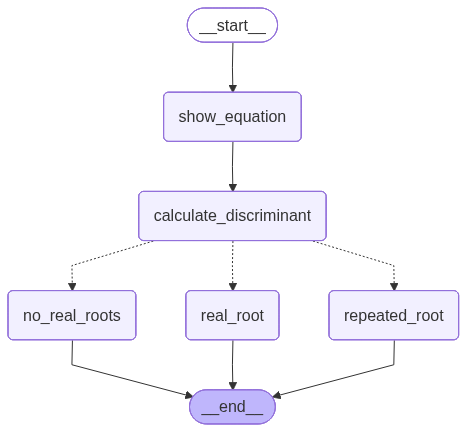

In [11]:
workflow

In [12]:
inital_state = {
    'a' : 4,
    'b' : -5,
    'c' : -4
}

workflow.invoke(inital_state)

{'a': 4,
 'b': -5,
 'c': -4,
 'equation': '4x2 -5x -4',
 'discriminant': 89,
 'result': 'the roots are 1.8042476415070754 and -0.5542476415070754'}